# Sine Wave Example

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [221]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [222]:
path = "/content/drive/MyDrive/9.RNN_SineWave_Generator/Sin Wave Data Generator.csv"

In [223]:
df = pd.read_csv(path)
df.head(10)

,Wave
0,0.841471
1,0.873736
2,0.902554
3,0.927809
4,0.949402
5,0.967249
6,0.981278
7,0.991435
8,0.997679
9,0.999986


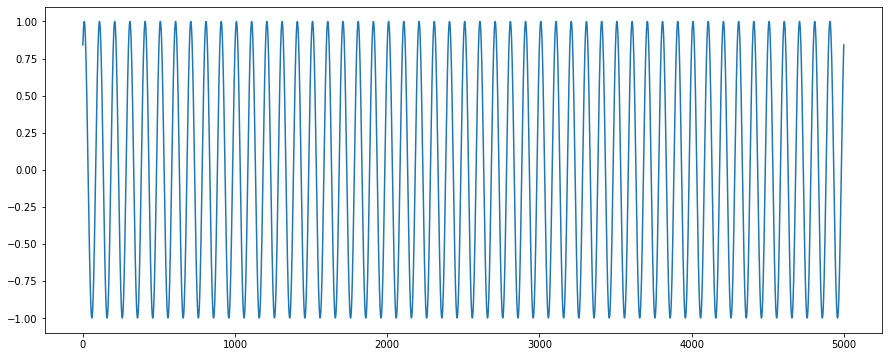

In [224]:
plt.figure(figsize = (15, 6))
plt.plot(df)
plt.show()

#Let's turn this into a DataFrame

In [225]:
# df = pd.DataFrame(data = x ,columns = ['x'])
# df
# df['Sine'] = pd.DataFrame(data = y)
# df

In [226]:
# df = pd.DataFrame(data = y, index = x, columns = ['Sine'])
# df.head(5)

## Train Test Split

Note! This is very different from our usual test/train split methodology!

In [227]:
# take last points

In [228]:
len(df)

5001

In [229]:
test_percent = 0.1 #10%

In [230]:
len(df)*test_percent

500.1

In [231]:
test_point = np.round(len(df)*test_percent)
test_point
# 10% of indices of tatal dataset are 500 indices

500.0

In [232]:
#test_point = np.round((len(df)*10)/100)

In [233]:
# Now lets take last points
test_ind = int(len(df)-test_point)

In [234]:
test_ind

4501

In [235]:
# Now split into Training and Test data
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [236]:
train.head(5)

,Wave
0,0.841471
1,0.873736
2,0.902554
3,0.927809
4,0.949402


In [237]:
test.head(5)

,Wave
4501,0.873736
4502,0.902554
4503,0.927809
4504,0.949402
4505,0.967249


## Scale Data

In [238]:
from sklearn.preprocessing import MinMaxScaler

In [239]:
scaler =  MinMaxScaler()
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

In [240]:
#scaler = MinMaxScaler()

In [241]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
#scaler.fit(train)

In [242]:
# scaled_train = scaler.transform(train)
# scaled_test = scaler.transform(test)

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [243]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [244]:
# define generator
length = 2 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_train, #X_train
                                scaled_train, #y_train
                                length = length, 
                                batch_size = batch_size)

In [245]:
len(scaled_train)

4501

In [246]:
len(generator) # n_input = 2

4499

In [247]:
# scaled_train

In [248]:
X, y = generator[0]

In [249]:
# What does the first batch look like?
X,y = generator[0]

In [250]:
X

array([[[0.92074142],
        [0.93687436]]])

In [251]:
y

array([[0.95128315]])

In [252]:
print(f'Given the Array: \n{X.flatten()}')
print("\n")
print(f'Predict this y: \n {y}')

Given the Array: 
[0.92074142 0.93687436]


Predict this y: 
 [[0.95128315]]


In [253]:
# Let's redefine to get 10 steps back and then predict the next step out
length = 10 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_train, scaled_train, length = length, batch_size = 1)

In [254]:
# What does the first batch look like?
X,y = generator[0]

In [255]:
print(f'Given the Array: \n{X.flatten()}')
print("\n")
print(f'Predict this y: \n {y}')

Given the Array: 
[0.92074142 0.93687436 0.95128315 0.96391093 0.97470786 0.98363135
 0.99064616 0.99572461 0.99884666 1.        ]


Predict this y: 
 [[0.99918006]]


In [256]:
length = 500 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_train, scaled_train, length = length, batch_size = 1)

Now you will be able to edit the length so that it makes sense for your time series!

### Create the Model

In [257]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,SimpleRNN

In [258]:
# We're only using one feature in our time series
n_features = 1

In [259]:
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(500, input_shape = (length, n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [260]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 500)               251000    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 501       
Total params: 251,501
Trainable params: 251,501
Non-trainable params: 0
_________________________________________________________________


In [261]:
# fit model
model.fit_generator(generator, epochs = 5)

Epoch 1/5
4001/4001 [==============================] - 957s 239ms/step - loss: 0.0786
Epoch 2/5
4001/4001 [==============================] - 957s 239ms/step - loss: 0.0603
Epoch 3/5
4001/4001 [==============================] - 958s 239ms/step - loss: 0.0539
Epoch 4/5
4001/4001 [==============================] - 958s 239ms/step - loss: 0.1836
Epoch 5/5
4001/4001 [==============================] - 959s 240ms/step - loss: 0.1994


In [262]:
model.history.history.keys()

dict_keys(['loss'])

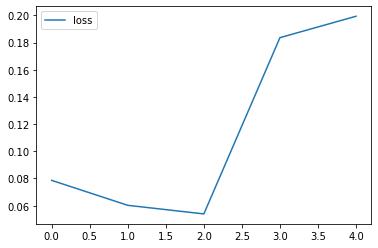

In [263]:
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.show()

## Evaluate on Test Data

In [264]:
first_eval_batch = scaled_train[-length:]

In [265]:
first_eval_batch[:6]

array([[0.93687436],
       [0.95128315],
       [0.96391093],
       [0.97470786],
       [0.98363135],
       [0.99064616]])

In [266]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [267]:
model.predict(first_eval_batch)

array([[0.38415867]], dtype=float32)

In [268]:
scaled_test[0]

array([0.93687436])

Now let's put this logic in a for loop to predict into the future for the entire test range.

----

In [269]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [270]:
current_batch.shape

(1, 500, 1)

In [271]:
#current_batch[:,45:,:]

In [272]:
#np.append(current_batch[:,1:,:],[[[99]]],axis=1) #[99] a random value

**NOTE: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUTED AND IN WHAT DIMENSIONS. ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!**

In [273]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))
#current_batch.shape
#np.append(current_batch[:,1:,:],[[[99]]],axis=1)

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis = 1)

In [ ]:
test_predictions[:6]

In [ ]:
scaled_test[:6]

## Inverse Transformations and Compare

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
true_predictions[:6]

In [ ]:
test.head(5)

In [ ]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

In [ ]:
test.plot(figsize = (10, 6))
plt.show()

## Adding in Early Stopping and Validation Generator

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss',patience = 2)

In [ ]:
length = 500
generator = TimeseriesGenerator(scaled_train,
                                scaled_train,
                                length = length,batch_size = 1)


validation_generator = TimeseriesGenerator(scaled_test,
                                           scaled_test,
                                           length = length,batch_size = 1)

# LSTMS

In [ ]:
# define model
model = Sequential()

# Simple RNN layer
model.add(LSTM(500, input_shape = (length, n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.fit_generator(generator, epochs = 20,
                   validation_data = validation_generator,
                   callbacks = [early_stop])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

In [ ]:
# IGNORE WARNINGS
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot(figsize = (12, 8))
plt.show()

# Forecasting

Forecast into unknown range. We should first utilize all our data, since we are now forecasting! Meaning beyond 50 (data we took upto 50 earlier, see df.plot()

In [ ]:
df.plot(figsize = (10, 6))
plt.show()

In [ ]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [ ]:
length = 500 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 1)

In [ ]:
model = Sequential()
model.add(LSTM(500, input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
model.fit_generator(generator, epochs = 6)

In [ ]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(100):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

In [ ]:
forecast = scaler.inverse_transform(forecast)

In [ ]:
forecast[:6]

In [ ]:
df.head(3)

In [ ]:
len(forecast)

In [ ]:
100*0.1 #0.1 is the step size in original data

In [ ]:
50.1+10

In [ ]:
#np.arange(start, stop, step)

forecast_index = np.arange(50.1,60.1,step=0.1)

#50.1=is starting point if we have to plot on original data 
#since 50 is the last point on original data with '0.1' step size, then add 5.0 (as calculated in 50*0.1) for stope point, 
#step size is 0.1

In [ ]:
len(forecast_index)

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(df.index, df['Wave'])
plt.plot(forecast_index,forecast)
plt.show()